In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [28]:
x=[0,3,4,2,12,19,16,20,7.5,10]
y=[3,6,1,8,12,15,10.9,18.67,15,7.5]


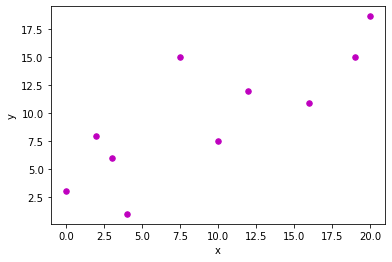

In [29]:
plt.scatter(x, y, color = "m", marker = "o", s = 30)
plt.xlabel('x') 
plt.ylabel('y')
plt.show()

In [30]:
l = []
for i in range(len(x)):
    l.append([x[i],y[i]])
    
print(l)

[[0, 3], [3, 6], [4, 1], [2, 8], [12, 12], [19, 15], [16, 10.9], [20, 18.67], [7.5, 15], [10, 7.5]]


In [31]:
k = np.array(l)
print(k)

[[ 0.    3.  ]
 [ 3.    6.  ]
 [ 4.    1.  ]
 [ 2.    8.  ]
 [12.   12.  ]
 [19.   15.  ]
 [16.   10.9 ]
 [20.   18.67]
 [ 7.5  15.  ]
 [10.    7.5 ]]


In [32]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(k)

In [33]:
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

In [34]:
clustering.labels_

array([6, 9, 4, 5, 7, 8, 2, 3, 1, 0], dtype=int64)

In [35]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


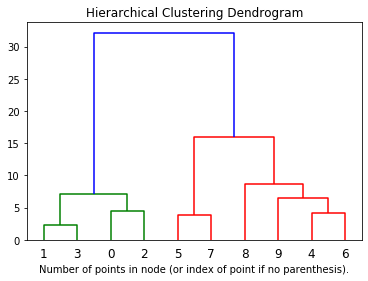

In [37]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()